# Introduction to Regression with Neural Network in Tensorflow

Regression is predicting a numerical variable based on some combination of variables. Or simply, predicting a number

In [3]:
#import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


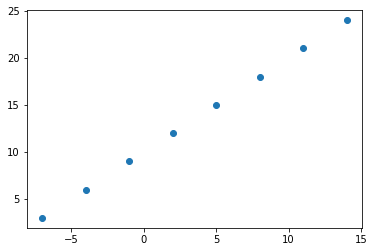

In [5]:
# create features
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])

#create labels 
y = np.array([3, 6, 9, 12, 15, 18, 21, 24])

#visualize 
plt.scatter(X, y)

In [6]:
#relationship between X and y, that we want out NN to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [7]:
# create a demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #it is empty because our tensor is a scalar

((), ())

In [11]:
#Turn the np arrays into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #it is empty because our tensor is a scalar

(TensorShape([]), TensorShape([]))

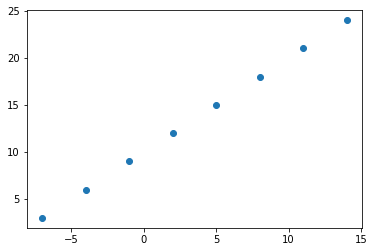

In [13]:
plt.scatter(X, y)

### Steps in modelling with tensorflow

1. **Creating a model**: define the input and output layers, as well as hidden layers of the DL model
2. **Compile the model**: define the loss function (the function that teslls our model how wrong it is) and the optimizer (tells the model how to improve the pattern it is learning), and evaluation metrics (used to interpret the performamce of our model.)
3. **Fitting the mode**l: Letting the model find pattern between the features and labels.

In [15]:
#SET SEED
tf.random.set_seed(42)

#create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) #one hidden layer with a single neuron

#
#compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics =['mae'])

#fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 28ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [16]:
#check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [18]:
#try to make predicition
y_pred = model.predict([17.0])

In [19]:
y_pred + 11
#The model is wrong (even after adding the mae), thus we need to improve it

array([[23.71602]], dtype=float32)

### Improve the model

The model can be improved by altering any of the 3 steps involved.

1. **In creating of mode**: we can add more layers, increase the number of neutrons in the hidden layer/s, change activation function of each layer.
2. **Compiling a model**: change the optimization function or perhaps the learning rate o the optimisation function
3. **Fitting a model**:  add more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

* The smaller model above was created to check if things work, before creating a larger model.

In [20]:
#Rebuild the model: increase the number of epochs only

# create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss='mae', optimizer='SGD', metrics =['mae'])

#fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 505ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6

In [23]:
#check the prediction from the model
model.predict([17]) 
#a better prediction than the previous

array([[29.739855]], dtype=float32)

In [26]:
#Rebuild the model: increase the number of hidden layers

# create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation='relu'),  
                             tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss='mae', optimizer='SGD', metrics =['mae'])

#fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 313ms/step - loss: 12.5326 - mae: 12.5326
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8956 - mae: 11.8956
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2464 - mae: 11.2464
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5791 - mae: 10.5791
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8874 - mae: 9.8874
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1649 - mae: 9.1649
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4050 - mae: 8.4050
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6117 - mae: 7.6117
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7798 - mae: 6.7798
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.8888 - mae: 5.8888
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

In [28]:
model.predict([17])
#The model is overfitting, because the loss errors are low but prediction on new data is bad

array([[32.787727]], dtype=float32)

In [40]:
#Rebuild the model: increase the number of hidden layers

# create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(50, activation=None),  
                             tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics =['mae'])

#fit the model
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 1s 627ms/step - loss: 14.6943 - mae: 14.6943
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 14.6242 - mae: 14.6242
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 14.5541 - mae: 14.5541
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 14.4840 - mae: 14.4840
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 14.4141 - mae: 14.4141
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 14.3441 - mae: 14.3441
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 14.2743 - mae: 14.2743
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 14.2045 - mae: 14.2045
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 14.1347 - mae: 14.1347
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 14.0650 - mae: 14.0650
Epoch 11/100
1/1 [==============================] - 0s 5m

In [42]:
model.predict([20])

array([[31.647211]], dtype=float32)